<a href="https://colab.research.google.com/github/DarkyWarky/Sms_spam-Classifier/blob/main/spam-classifier-performance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install nltk scikit-learn matplotlib


In [3]:
import pandas as pd
import requests
from zipfile import ZipFile
from io import BytesIO
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc


In [9]:
nltk.download('stopwords')
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00228/smsspamcollection.zip'
response = requests.get(url)
with ZipFile(BytesIO(response.content)) as z:
    with z.open('SMSSpamCollection') as f:
        df = pd.read_csv(f, sep='\t', names=['label', 'message'])

df.info()

df['label'] = df['label'].map({'ham': 0, 'spam': 1})

stop_words = set(stopwords.words('english'))
ps = PorterStemmer()
df['message'] = df['message'].apply(lambda x: ' '.join([ps.stem(word) for word in x.split() if word.lower() not in stop_words]))
df

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


,label,message
0,0,"go jurong point, crazy.. avail bugi n great wo..."
1,0,ok lar... joke wif u oni...
2,1,free entri 2 wkli comp win fa cup final tkt 21...
3,0,u dun say earli hor... u c alreadi say...
4,0,"nah think goe usf, live around though"
...,...,...
5567,1,2nd time tri 2 contact u. u £750 pound prize. ...
5568,0,ü b go esplanad fr home?
5569,0,"pity, * mood that. so...ani suggestions?"
5570,0,guy bitch act like i'd interest buy someth els...


In [6]:
X_train, X_test, y_train, y_test = train_test_split(df['message'], df['label'], test_size=0.2, random_state=42)


vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)


model = MultinomialNB()
model.fit(X_train_vectorized, y_train)


y_pred = model.predict(X_test_vectorized)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}\n')

print('Classification Report:')
print(classification_report(y_test, y_pred))

print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.99

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       966
           1       0.98      0.94      0.96       149

    accuracy                           0.99      1115
   macro avg       0.98      0.97      0.98      1115
weighted avg       0.99      0.99      0.99      1115

Confusion Matrix:
[[963   3]
 [  9 140]]


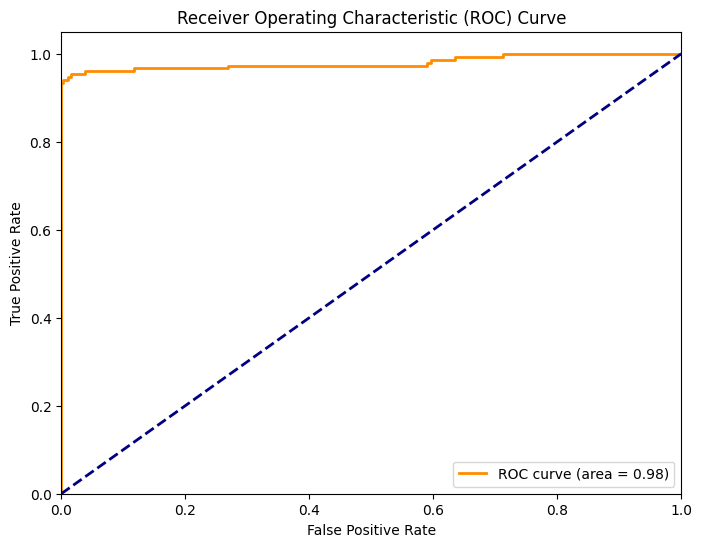

In [8]:
fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test_vectorized)[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')

plt.show()
